
# Simple image classification with Lightning Flash

* **Author:** PL team
* **License:** CC BY-SA
* **Generated:** 2023-01-05T13:50:53.263007

This is a template to show simple image classification case if for some reason accelerator is required.


---
Open in [Open In Colab{height="20px" width="117px"}](https://colab.research.google.com/github/PytorchLightning/lightning-tutorials/blob/publication/.notebooks/templates/img-classify.ipynb)

Give us a ⭐ [on Github](https://www.github.com/Lightning-AI/lightning/)
| Check out [the documentation](https://pytorch-lightning.readthedocs.io/en/stable/)
| Join us [on Slack](https://www.pytorchlightning.ai/community)

## Setup
This notebook requires some packages besides pytorch-lightning.

In [1]:
! pip install --quiet "matplotlib>=3.0" "numpy<1.24" "lightning-flash[image]>=0.7" "pandas>=1.0" "seaborn" "torchmetrics>=0.7, <0.12" "setuptools==65.6.3" "pytorch-lightning>=1.4, <1.9" "ipython[notebook]>=8.0.0, <8.9.0" "torch>=1.8.1, <1.14.0"

ERROR: Cannot install lightning-flash[image]==0.7.0, lightning-flash[image]==0.7.1, lightning-flash[image]==0.7.2, lightning-flash[image]==0.7.3, lightning-flash[image]==0.7.4, lightning-flash[image]==0.7.5, lightning-flash[image]==0.8.0, lightning-flash[image]==0.8.1, lightning-flash[image]==0.8.1.post0 and setuptools==65.6.3 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [2]:
import os

import flash
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from flash.image import ImageClassificationData, ImageClassifier
from IPython.core.display import display
from pytorch_lightning.loggers import CSVLogger

PATH_DATASETS = os.environ.get("PATH_DATASETS", ".")
# this dataset is automatically downloaded and extracted based on meta link
# this archive includes the one more level - folder with the same name
DATA_HYMENOPLERA = os.path.join(PATH_DATASETS, "hymenoptera_data", "hymenoptera_data")

/usr/local/lib/python3.9/dist-packages/pl_bolts/callbacks/data_monitor.py:20: UnderReviewWarning: The feature warn_missing_pkg is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  warn_missing_pkg("wandb")
/usr/local/lib/python3.9/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:35: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/usr/local/lib/python3.9/dist-packages/pl_bolts/models/self_supervised

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and may be removed in the future. Please access them via the appropriate Weights Enum instead.
  warnings.warn(


/tmp/ipykernel_3082/3275308287.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


## 1. Create the DataModule

In [3]:
datamodule = ImageClassificationData.from_folders(
    train_folder=f"{DATA_HYMENOPLERA}/train/",
    val_folder=f"{DATA_HYMENOPLERA}/val/",
    batch_size=1024,
)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3442: FutureWarning: Please pass an instantiated object of the `InputTransform` class. Passing the Class and keyword arguments separately has been deprecated since v0.8.0 and will be removed in v0.9.0.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/utilities/apply_func.py:31: LightningDeprecationWarning: `pytorch_lightning.utilities.apply_func.apply_to_collection` has been deprecated in v1.8.0 and will be removed in v1.10.0. Please use `lightning_utilities.core.apply_func.apply_to_collection` instead.
  rank_zero_deprecation(


## 2. Build the task

In [4]:
model = ImageClassifier(backbone="resnet18", labels=datamodule.labels)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## 3. Create the trainer and finetune the model

In [5]:
logger = CSVLogger(save_dir="logs/")
trainer = flash.Trainer(logger=logger, max_epochs=3, gpus=1)
trainer.finetune(model, datamodule=datamodule, strategy="freeze")

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:441: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


Missing logger folder: logs/lightning_logs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2,3]



  | Name          | Type           | Params
-------------------------------------------------
0 | train_metrics | ModuleDict     | 0     
1 | val_metrics   | ModuleDict     | 0     
2 | test_metrics  | ModuleDict     | 0     
3 | adapter       | DefaultAdapter | 11.2 M
-------------------------------------------------
10.6 K    Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/trainer.py:1595: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=3` reached.


,val_accuracy,val_cross_entropy,train_accuracy_epoch,train_cross_entropy_epoch
epoch,,,,
0,0.673203,0.605621,NaN,NaN
0,NaN,NaN,0.549180,0.684829
1,0.732026,0.549409,NaN,NaN
1,NaN,NaN,0.663934,0.611525
2,0.777778,0.503361,NaN,NaN


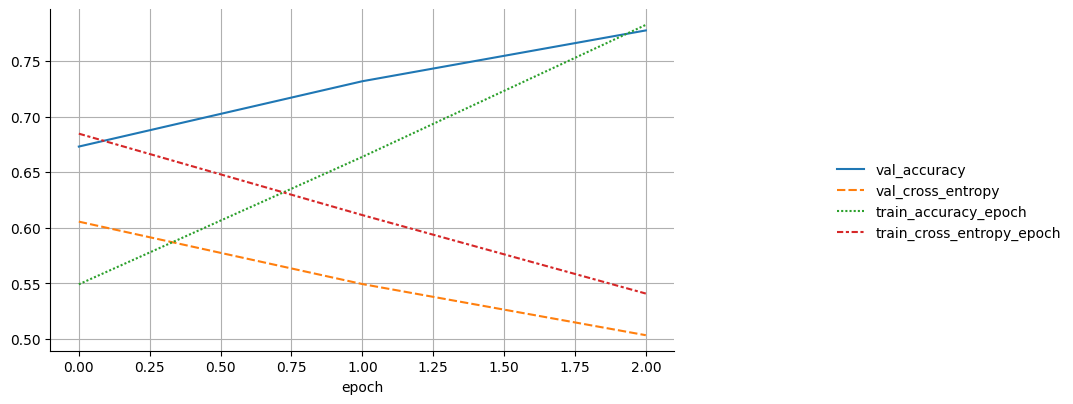

In [6]:
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
del metrics["step"]
metrics.set_index("epoch", inplace=True)
display(metrics.dropna(axis=1, how="all").head())

g = sn.relplot(data=metrics, kind="line")
plt.gcf().set_size_inches(12, 4)
plt.grid()

## 4. Predict what's on a few images! ants or bees?

In [7]:
datamodule = ImageClassificationData.from_files(
    predict_files=[
        f"{DATA_HYMENOPLERA}/val/bees/65038344_52a45d090d.jpg",
        f"{DATA_HYMENOPLERA}/val/bees/590318879_68cf112861.jpg",
        f"{DATA_HYMENOPLERA}/val/ants/540543309_ddbb193ee5.jpg",
    ],
    batch_size=3,
)
predictions = trainer.predict(model, datamodule=datamodule, output="labels")
print(predictions)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3442: FutureWarning: Please pass an instantiated object of the `InputTransform` class. Passing the Class and keyword arguments separately has been deprecated since v0.8.0 and will be removed in v0.9.0.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/utilities/apply_func.py:31: LightningDeprecationWarning: `pytorch_lightning.utilities.apply_func.apply_to_collection` has been deprecated in v1.8.0 and will be removed in v1.10.0. Please use `lightning_utilities.core.apply_func.apply_to_collection` instead.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2,3]


/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 1it [00:00, ?it/s]

[['bees', 'bees', 'ants']]


## 5. Save the model!

In [8]:
trainer.save_checkpoint("image_classification_model.pt")

## Congratulations - Time to Join the Community!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the Lightning
movement, you can do so in the following ways!

### Star [Lightning](https://github.com/Lightning-AI/lightning) on GitHub
The easiest way to help our community is just by starring the GitHub repos! This helps raise awareness of the cool
tools we're building.

### Join our [Slack](https://www.pytorchlightning.ai/community)!
The best way to keep up to date on the latest advancements is to join our community! Make sure to introduce yourself
and share your interests in `#general` channel


### Contributions !
The best way to contribute to our community is to become a code contributor! At any time you can go to
[Lightning](https://github.com/Lightning-AI/lightning) or [Bolt](https://github.com/Lightning-AI/lightning-bolts)
GitHub Issues page and filter for "good first issue".

* [Lightning good first issue](https://github.com/Lightning-AI/lightning/issues?q=is%3Aopen+is%3Aissue+label%3A%22good+first+issue%22)
* [Bolt good first issue](https://github.com/Lightning-AI/lightning-bolts/issues?q=is%3Aopen+is%3Aissue+label%3A%22good+first+issue%22)
* You can also contribute your own notebooks with useful examples !

### Great thanks from the entire Pytorch Lightning Team for your interest !

[Pytorch Lightning{height="60px" width="240px"}](https://pytorchlightning.ai)